In [1]:
%%HTML
<style>
    .container { width: 99%; }
</style>

In [2]:
%run 'src/timestamps.py'

create_timestamps()

In [3]:
import pandas as pd
import json

def load_dataset(file):
    return pd.read_json('datasets/' + file + '.json', lines=True)

In [4]:
dataset = load_dataset('it')

In [5]:
df = pd.DataFrame('', index=[0], columns=['name_scu', 'unit_scu', 'value_scu', 'name_sru', 'unit_sru', 'value_sru', 'name_slf', 'unit_slf', 'value_slf', 'name_sls', 'unit_sls', 'value_sls', 'name_tu', 'unit_tu', 'value_tu', 'name_td', 'unit_td', 'value_td', 'name_n', 'unit_n', 'value_n'])

In [6]:
df_template = df.copy()

In [7]:
%%time
for x in range(0, len(dataset)):
    if x > 0:
        df = df.append(df_template, ignore_index=True)
    for y in range(0, len(df.columns), 3):
        df.loc[x][y], df.loc[x][y+1], df.loc[x][y+2] = pd.DataFrame(dataset[y/3][x], index=[0]).values[0]

CPU times: user 12 s, sys: 208 ms, total: 12.2 s
Wall time: 12.2 s


In [8]:
df['date_time'] = ''

In [9]:
for i in range(0, len(dataset)):
    df['date_time'][i] = get_timestamp(i)

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

In [10]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['value_scu'] = pd.to_numeric(df['value_scu'])
df['value_sru'] = pd.to_numeric(df['value_sru'])
df['value_slf'] = pd.to_numeric(df['value_slf'])
df['value_sls'] = pd.to_numeric(df['value_sls'])
df['value_tu']  = pd.to_numeric(df['value_tu'])
df['value_td']  = pd.to_numeric(df['value_td'])

In [11]:
df = df.set_index(df['date_time'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1902 entries, 2020-11-26 05:15:22 to 2020-11-27 12:56:22
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  1902 non-null   datetime64[ns]
 1   name_scu   1902 non-null   object        
 2   unit_scu   1902 non-null   object        
 3   value_scu  1902 non-null   int64         
 4   name_sru   1902 non-null   object        
 5   unit_sru   1902 non-null   object        
 6   value_sru  1902 non-null   int64         
 7   name_slf   1902 non-null   object        
 8   unit_slf   1902 non-null   object        
 9   value_slf  1902 non-null   int64         
 10  name_sls   1902 non-null   object        
 11  unit_sls   1902 non-null   object        
 12  value_sls  1902 non-null   int64         
 13  name_tu    1902 non-null   object        
 14  unit_tu    1902 non-null   object        
 15  value_tu   1902 non-null   int64         
 16  name_t

In [13]:
df.describe()

,value_scu,value_sru,value_slf,value_sls,value_tu,value_td
count,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000
mean,48.769716,19.339117,99.996845,986.048896,44.466351,54.067823
std,15.482170,6.306242,53.087028,131.885267,2.843021,25.517024
min,0.000000,0.000000,1.000000,10.000000,40.000000,10.000000
25%,37.000000,14.000000,94.000000,947.250000,42.000000,33.000000
50%,49.000000,19.000000,99.000000,999.500000,44.000000,54.000000
75%,62.000000,25.000000,104.000000,1050.000000,47.000000,75.000000
max,74.000000,29.000000,1542.000000,1099.000000,49.000000,99.000000


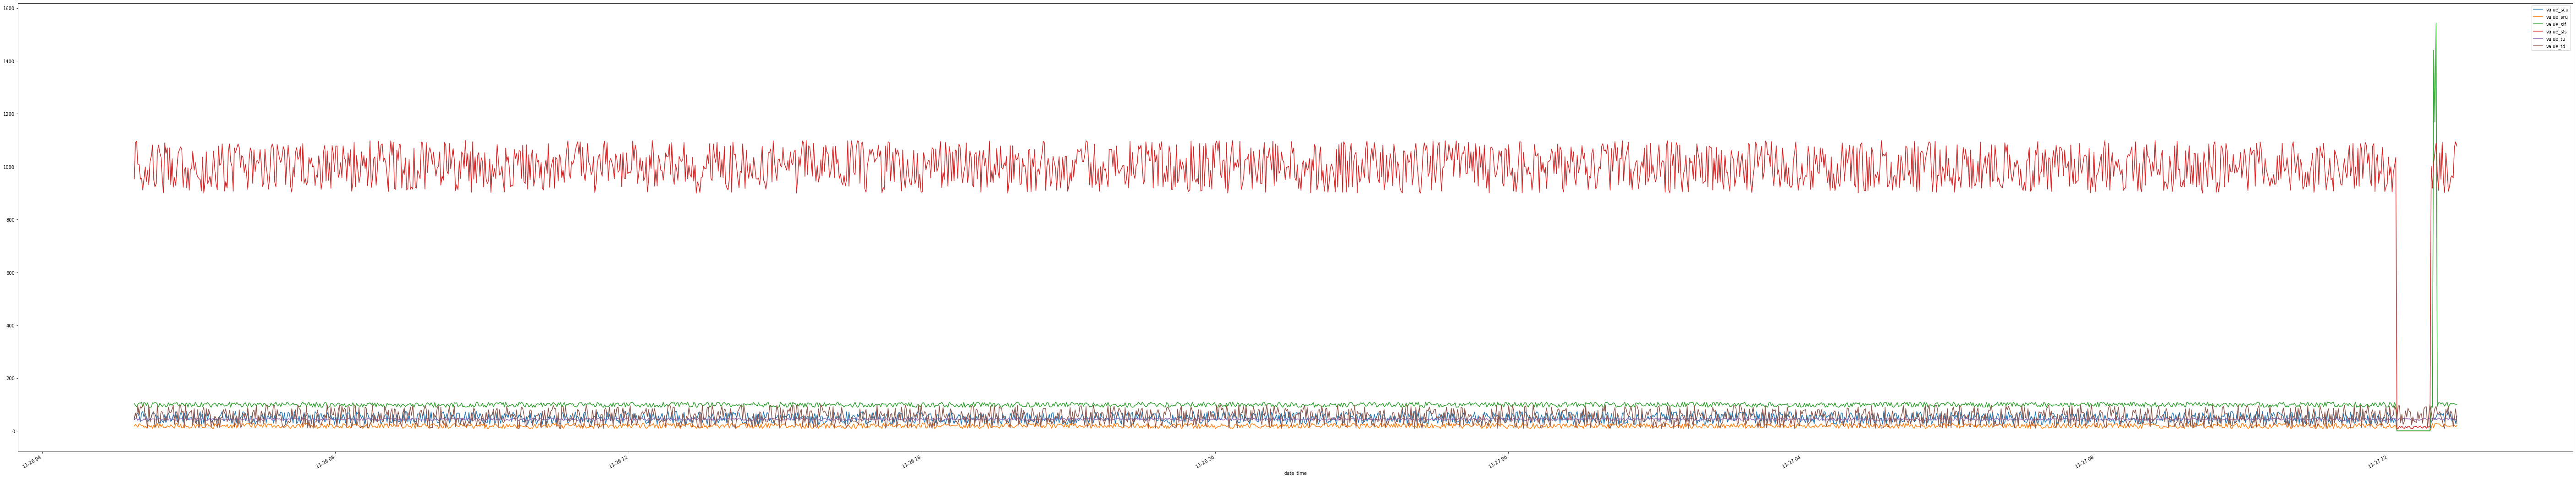

In [14]:
ax  = df.plot(x='date_time', figsize=(100,20))
fig = ax.get_figure()
fig.savefig('plots/it.pdf')

In [15]:
df['value_n'].describe()

count                                            1902
unique                                             18
top       pre check of ubuntu 20.05 LTS initiated<br>
freq                                              230
Name: value_n, dtype: object

In [16]:
pt = df.pivot_table(index=['value_n'], aggfunc='size')
pt

value_n
The main airport server is under maintenance. Backup-Server in operation.<br>all systems running normal<br>                    1
The main airport server is under maintenance. Backup-Server in operation.<br>checking firewall alerts<br>                      5
The main airport server is under maintenance. Backup-Server in operation.<br>coffee maschine out of order :-o<br>              3
The main airport server is under maintenance. Backup-Server in operation.<br>firewall updated<br>                              2
The main airport server is under maintenance. Backup-Server in operation.<br>latest iX magazine available in the hall<br>      5
The main airport server is under maintenance. Backup-Server in operation.<br>major admin meeting in room No.23<br>             3
The main airport server is under maintenance. Backup-Server in operation.<br>minor network tests in operation<br>              3
The main airport server is under maintenance. Backup-Server in operation.<br>pre check of

<AxesSubplot:ylabel='value_n'>

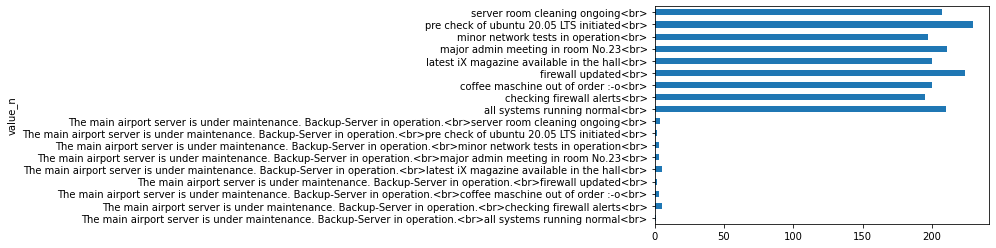

In [17]:
pt.plot.barh()